# Stock Data, Machine Learning, and Neural Networks

In this notebook, we will be using the cleaned csv file that you obtained from the Stock_api.ipynb notebook to model the data. In this case, we will be using the GOOG.csv file to run machine learning models on. 

In [52]:
#Importing the basic modules.
import pandas as pd 
import numpy as np

In [53]:
#Import the cleaned dataset from our Stock_api notebook and using the date as the index
data = pd.read_csv('C:/Users/linwi/Documents/Stock_test/Cleaned_Dataset/GOOG.csv',index_col = 0)

In [54]:
#Check
data.head()

,open,high,low,close,adjusted close,volume
2024-04-01,151.650,156.990,151.65,156.50,156.50,24413368
2024-03-28,152.000,152.670,151.33,152.26,152.26,21105628
2024-03-27,152.145,152.690,150.13,151.94,151.94,16621964
2024-03-26,151.240,153.200,151.03,151.70,151.70,19312694
2024-03-25,150.950,151.456,148.80,151.15,151.15,15114728


In [55]:
#Check the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8+ KB


In [56]:
#Changng the datatype of the index to date time.
data.index = pd.to_datetime(data.index)

In [57]:
#check 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


## Modeling,Visualizations, and Evaluations

### Preprocessing and Feature Engineering

Our target will be the next day's price of the stock. We will be creating new columns to help with the modeling.

In [58]:
#Create a new column for called tomorrow. This gives us the adjusted close price for the next day.
data['Tomorrow_Adj_close'] = data["adjusted close"].shift(1)

In [59]:
#Check
data

,open,high,low,close,adjusted close,volume,Tomorrow_Adj_close
2024-04-01,151.650,156.990,151.65,156.50,156.5000,24413368,NaN
2024-03-28,152.000,152.670,151.33,152.26,152.2600,21105628,156.5000
2024-03-27,152.145,152.690,150.13,151.94,151.9400,16621964,152.2600
2024-03-26,151.240,153.200,151.03,151.70,151.7000,19312694,151.9400
2024-03-25,150.950,151.456,148.80,151.15,151.1500,15114728,151.7000
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,28.3500,146700,28.4870
2014-04-01,558.710,568.450,558.71,567.16,28.3580,7900,28.3500
2014-03-31,566.890,567.000,556.93,556.97,27.8485,10800,28.3580
2014-03-28,561.200,566.430,558.67,559.99,27.9995,41100,27.8485


We will be getting rid of the `close` column as it doesn't adjust for stock splits.

In [60]:
del data['close']

Create another column called `Target` to see if `Tomorrow_Adj_close` price is greater than present day's `Close` price. We may use the target column later to predict the direction that the stock will go. But for now, we will be focused on predicting the future price of the stock.

In [61]:
#Create a new column called Target of 1(True) and 0(False) to see if tomorrow's adjusted close price is greater than today's close price.
data["Target"] = (data['Tomorrow_Adj_close'] > data["adjusted close"]).astype(int)

In [62]:
data

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-04-01,151.650,156.990,151.65,156.5000,24413368,NaN,0
2024-03-28,152.000,152.670,151.33,152.2600,21105628,156.5000,1
2024-03-27,152.145,152.690,150.13,151.9400,16621964,152.2600,1
2024-03-26,151.240,153.200,151.03,151.7000,19312694,151.9400,1
2024-03-25,150.950,151.456,148.80,151.1500,15114728,151.7000,1
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,28.3500,146700,28.4870,1
2014-04-01,558.710,568.450,558.71,28.3580,7900,28.3500,0
2014-03-31,566.890,567.000,556.93,27.8485,10800,28.3580,1
2014-03-28,561.200,566.430,558.67,27.9995,41100,27.8485,0


In [63]:
#Dropping null values
data.dropna(inplace = True)

Now that we have set up our data and did some feature engineering, we will start with modeling.

### Modeling

In [64]:
#Importing the Linear Regression Model
from sklearn.linear_model import LinearRegression #Importing the baseline linear regression model

We will be using the linear regression model as our baseline model to predict the `Tomorrow_Adj_Close` price.

In [65]:
model = LinearRegression()

#### Splitting the Data

In [66]:
train = data.iloc[100:]
test = data.iloc[:100] 

predictors = ["adjusted close", "open", "high", "volume", "low"]

The predictors are the columns that we will be using to predict the future price and target direction of the stock. Thus, we are excluding `target` and `Tomorrow_adj_close` since it has data of the future records.

#### Linear Regression

In [67]:
regression_results = model.fit(train[predictors],train["Tomorrow_Adj_close"])

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
#Getting the predictions of the model
predictions = model.predict(test[predictors])

In [69]:
#Turning the predictions into a series for easier readability
predictions = pd.Series(predictions, index = test.index)
predictions

2024-03-28    152.236946
2024-03-27    151.899434
2024-03-26    151.669163
2024-03-25    151.104323
2024-03-22    151.738446
                 ...    
2023-11-09    131.678151
2023-11-08    133.234224
2023-11-07    132.391606
2023-11-06    131.427195
2023-11-03    130.364835
Length: 100, dtype: float64

In [70]:
#Getting the mean absolute error and mean squared error 
linear_mae = mean_absolute_error(test['Tomorrow_Adj_close'], predictions)
linear_mse = mean_squared_error(test['Tomorrow_Adj_close'],predictions)
linear_mape = mean_absolute_percentage_error(test['Tomorrow_Adj_close'],predictions)
print(f"The mean absolute error is {linear_mae},the mean squared error is {linear_mse} and the mean absolute percentage error is {linear_mape}.")


The mean absolute error is 1.686761814453429,the mean squared error is 5.440945326220078 and the mean absolute percentage error is 0.0119381744604786.


In [71]:
Report = {"Model": "Linear Regression",
          "Metrics":["MAE", "MSE", "MAPE"],
          "Result": [linear_mae,linear_mse,linear_mape]}
Report_df = pd.DataFrame(Report)
Report_df

,Model,Metrics,Result
0,Linear Regression,MAE,1.686762
1,Linear Regression,MSE,5.440945
2,Linear Regression,MAPE,0.011938


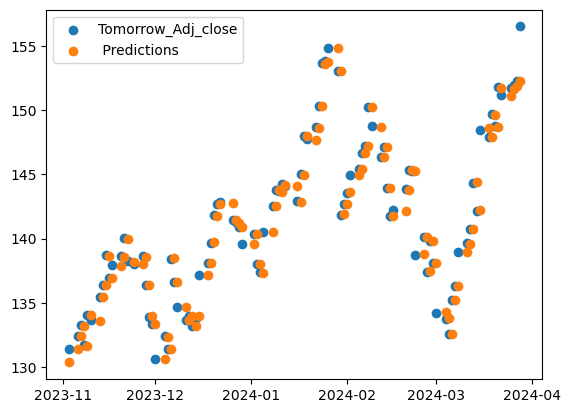

In [72]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=test.index,y=test['Tomorrow_Adj_close'])
plt.scatter(x=test.index,y=predictions)
plt.legend(['Tomorrow_Adj_close',' Predictions'])
plt.show()

#### Random Forests

We will be using a random forest regressor model to help us predict the future close price for the next day.

In [73]:
from sklearn.ensemble import RandomForestRegressor
#Instantiating the model
forest_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [74]:
forest_model.fit(train[predictors], train["Tomorrow_Adj_close"])

RandomForestRegressor(min_samples_split=100, random_state=1)

In [75]:
#Getting the predictions from the forest model
forest_predictions = forest_model.predict(test[predictors])

In [76]:
#Turning the predictions into a series with the date index for easier interpretation
forest_predictions = pd.Series(forest_predictions,index = test.index)
forest_predictions

2024-03-28    142.425916
2024-03-27    142.425916
2024-03-26    142.425916
2024-03-25    142.425916
2024-03-22    142.425916
                 ...    
2023-11-09    129.522622
2023-11-08    136.561967
2023-11-07    129.751596
2023-11-06    129.522622
2023-11-03    129.397174
Length: 100, dtype: float64

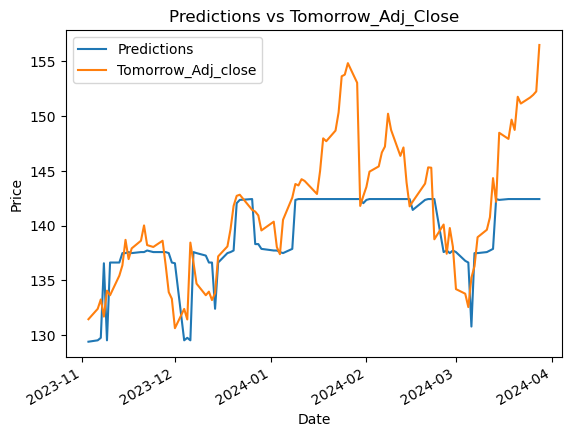

In [77]:
#Plotting the predictions and actual price values
plt.figure()
forest_predictions.plot(label = 'Predictions')
test['Tomorrow_Adj_close'].plot(label = 'Tomorrow_Adj_close')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predictions vs Tomorrow_Adj_Close')
plt.show()

Obtaining the evaluation metrics for Random Forest. We will continue to use Mean Absolute Error,Mean Squared Error and Mean Absolute Percentage Error.

In [78]:
#Getting the mean absolute error and mean squared error 
forest_mae = mean_absolute_error(test['Tomorrow_Adj_close'], forest_predictions)
forest_mse = mean_squared_error(test['Tomorrow_Adj_close'],forest_predictions)
forest_mape = mean_absolute_percentage_error(test['Tomorrow_Adj_close'],forest_predictions)
print(f"The mean absolute error is {forest_mae},the mean squared error is {forest_mse} and the mean absolute percentage error is {forest_mape}.")

The mean absolute error is 3.55063505940767,the mean squared error is 22.188249155137537 and the mean absolute percentage error is 0.02455485422172408.


We will add the results to the report table and do a comparison for the evaulation metrics.

In [79]:
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor', 'MAE', forest_mae]
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor', 'MSE', forest_mse]
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor', 'MAPE', forest_mape]

In [80]:
Report_df

,Model,Metrics,Result
0,Linear Regression,MAE,1.686762
1,Linear Regression,MSE,5.440945
2,Linear Regression,MAPE,0.011938
3,Random Forest Regressor,MAE,3.550635
4,Random Forest Regressor,MSE,22.188249
5,Random Forest Regressor,MAPE,0.024555


We can see that the Random Forest Regressor is worse than the linear regression model. We may add more features improve the prediction capabilities of the model in the future.

#### LSTM - Neural Network

We will be using the Long Short term memory neural network to help us predict the next day's close price.

First, lets review what our dataset looks like.

In [81]:
data.head()

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-03-28,152.000,152.670,151.33,152.26,21105628,156.50,1
2024-03-27,152.145,152.690,150.13,151.94,16621964,152.26,1
2024-03-26,151.240,153.200,151.03,151.70,19312694,151.94,1
2024-03-25,150.950,151.456,148.80,151.15,15114728,151.70,1
2024-03-22,150.240,152.560,150.09,151.77,19252925,151.15,0


With the dataframe above, we will be creating a new dataframe to help us create a better LSTM model. 

In [82]:
#Creating a new copy of the dataframe
LSTM_data = data.copy()

In [84]:
#Check
LSTM_data.head(10)

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-03-28,152.000,152.670,151.3300,152.26,21105628,156.50,1
2024-03-27,152.145,152.690,150.1300,151.94,16621964,152.26,1
2024-03-26,151.240,153.200,151.0300,151.70,19312694,151.94,1
2024-03-25,150.950,151.456,148.8000,151.15,15114728,151.70,1
2024-03-22,150.240,152.560,150.0900,151.77,19252925,151.15,0
2024-03-21,150.320,151.305,148.0101,148.74,19843915,151.77,1
2024-03-20,148.790,149.760,147.6650,149.68,17729996,148.74,0
2024-03-19,148.980,149.620,147.0100,147.92,17748367,149.68,1
2024-03-18,149.370,152.930,148.1400,148.48,47676689,147.92,0
2024-03-15,143.410,144.340,141.1301,142.17,41039494,148.48,1


In [86]:
#Changing the datetime index so the most recent dates appear at the end
LSTM_data.sort_index(inplace = True, ascending = True)
LSTM_data.head()

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2014-03-27,568.000,568.00,552.92,27.9230,13100,27.9995,1
2014-03-28,561.200,566.43,558.67,27.9995,41100,27.8485,0
2014-03-31,566.890,567.00,556.93,27.8485,10800,28.3580,1
2014-04-01,558.710,568.45,558.71,28.3580,7900,28.3500,0
2014-04-02,565.106,604.83,562.19,28.3500,146700,28.4870,1


Now that we finished creating and adjusting our dataframe, we can scale our data using the MinMaxScaler. All the values will be between 0 and 1.

In [104]:
#Only retrieving the adjusted close values and creating a dataframe and turning the values into a float
data1 = LSTM_data.filter(['adjusted close']).values
dataset = data1.astype('float32')

In [105]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = mm_scaler.fit_transform(dataset)
print(scaled_dataset)

[[0.02530864]
 [0.02589613]
 [0.02473648]
 ...
 [0.9758855 ]
 [0.9777287 ]
 [0.9801862 ]]


**Creating our X and y for train and test splits.**

In [106]:
# Create the scaled training dataset
sequence_length = 60

train_data = scaled_dataset[:int(len(scaled_dataset)*0.8), :]
x_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [107]:
#Reshaping for LSTM 

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\linwi\anaconda3\envs\timeseries\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0314
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0021
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0019
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0018
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0012
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0012
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0010
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0015
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0012
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0012
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - l

In [110]:
# Create the testing dataset
test_data = scaled_dataset[int(len(scaled_dataset)*0.8)-sequence_length:, :]
x_test = []
y_test = scaled_dataset[int(len(scaled_dataset)*0.8):, :]

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [116]:
# Get the model's predicted price values
predictions = model.predict(x_test)
#Transforming them back to their original price values
predictions = mm_scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\linwi\AppData\Local\Temp\ipykernel_3124\939592846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


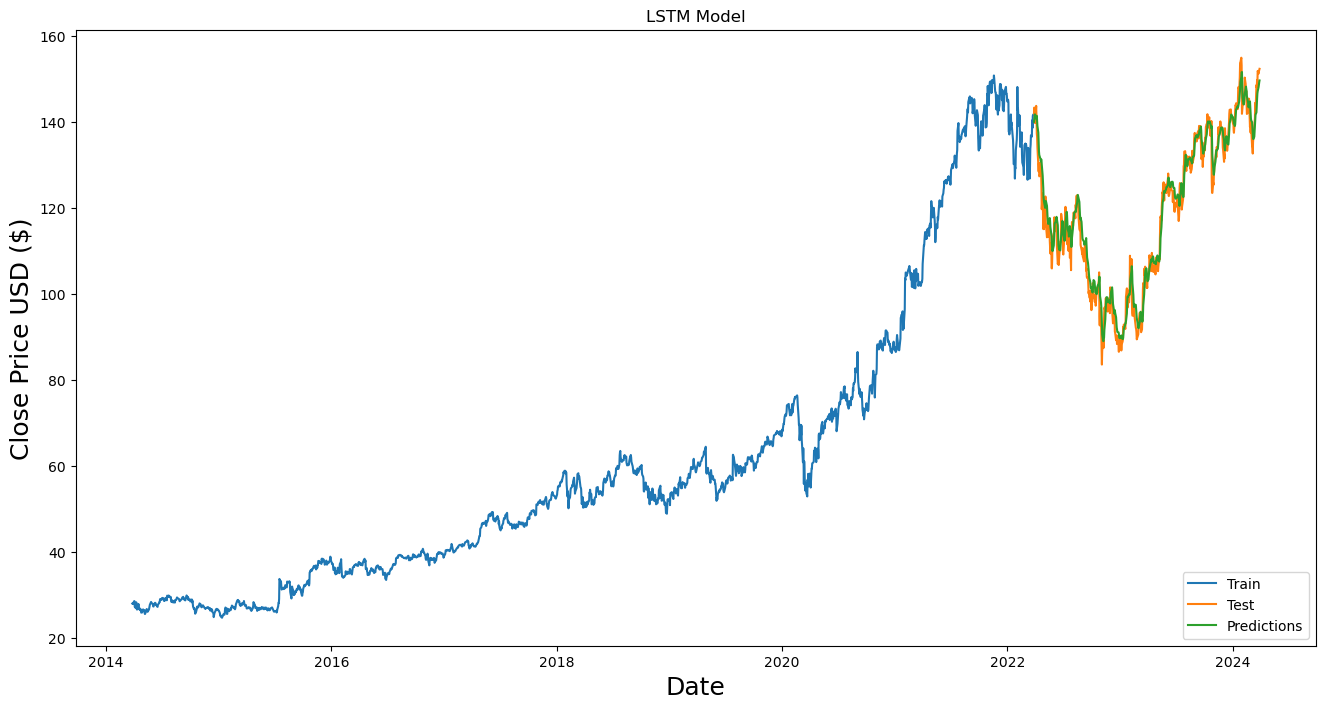

In [117]:
# Plot the data
train = LSTM_data[:int(len(dataset)*0.8)]
valid = LSTM_data[int(len(dataset)*0.8):]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['adjusted close'])
plt.plot(valid[['adjusted close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()